In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv"

In [6]:
df0 = pd.read_csv(url)
df0.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
df0.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Data Cleaning, filling null values if any

In [9]:
df0.rename(columns={'yrs.since.phd': 'yrs_since_phd', 'yrs.service': 'yrs_service'}, inplace=True)

In [10]:
df0.isna().sum().sum()

0

In [11]:
df0['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [12]:
df0['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [13]:
df0['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [14]:
df1 = df0.copy()

# Encoding

In [15]:
rank_dict = {'AsstProf': 1, 'AssocProf': 2, 'Prof': 3}

df1['rank'] = df1['rank'].map(rank_dict)

In [16]:
df1 = pd.get_dummies(df1, drop_first=True)

In [17]:
df2 = df1.copy()

In [18]:
df2 = df1.copy()

In [19]:
df2.head()

,rank,yrs_since_phd,yrs_service,salary,discipline_B,sex_Male
0,3,19,18,139750,1,1
1,3,20,16,173200,1,1
2,1,4,3,79750,1,1
3,3,45,39,115000,1,1
4,3,40,41,141500,1,1


In [20]:
df2.shape

(397, 6)

In [21]:
df2.describe()

,rank,yrs_since_phd,yrs_service,salary,discipline_B,sex_Male
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2.501259,22.314861,17.614610,113706.458438,0.544081,0.901763
std,0.767472,12.887003,13.006024,30289.038695,0.498682,0.298010
min,1.000000,1.000000,0.000000,57800.000000,0.000000,0.000000
25%,2.000000,12.000000,7.000000,91000.000000,0.000000,1.000000
50%,3.000000,21.000000,16.000000,107300.000000,1.000000,1.000000
75%,3.000000,32.000000,27.000000,134185.000000,1.000000,1.000000
max,3.000000,56.000000,60.000000,231545.000000,1.000000,1.000000


# Initial predictions using linear models

# Using LinearRegression() & NO Standardisation

In [22]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6213076853231545
MAE :  12978.266449141543
MSE :  261241497.95150915
SMSE :  16162.966867240344
-----------
-----------
training score :  0.40840562786984536
testing score :  0.6213076853231545


# Using Ridge() & NO Standardisation

In [23]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = Ridge()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.620696406875483
MAE :  12992.958012425177
MSE :  261663189.3646857
SMSE :  16176.006595098981
-----------
-----------
training score :  0.4083772218315569
testing score :  0.620696406875483


# Using BayesianRidge() & NO Standardisation

In [24]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = BayesianRidge()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6184709618467633
MAE :  13035.379077093017
MSE :  263198416.17119637
SMSE :  16223.391019487768
-----------
-----------
training score :  0.40799514366765954
testing score :  0.6184709618467633


# checking tha data distribution..

0.29974153157458827


<AxesSubplot:ylabel='Frequency'>

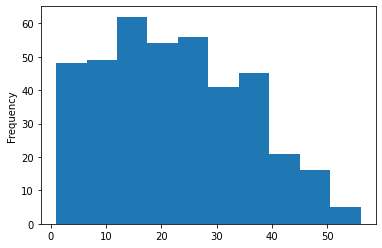

In [25]:
print(stat.skew(df2['yrs_since_phd']))
df2['yrs_since_phd'].plot(kind="hist")

0.6481088240680349


<AxesSubplot:ylabel='Frequency'>

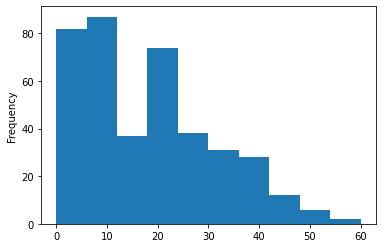

In [26]:
print(stat.skew(df2['yrs_service']))
df2['yrs_service'].plot(kind="hist")

0.7118657337591157


<AxesSubplot:ylabel='Frequency'>

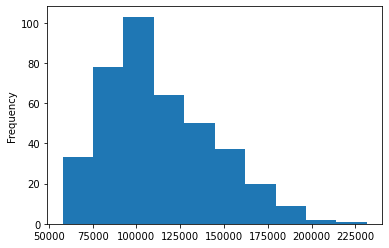

In [27]:
print(stat.skew(df2['salary']))
df2['salary'].plot(kind="hist")

0.7118657337591157


<AxesSubplot:ylabel='Frequency'>

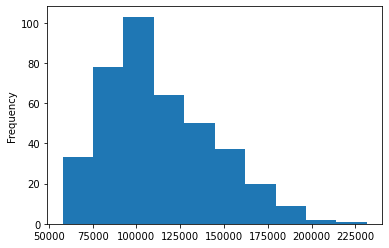

In [28]:
print(stat.skew(df2['salary']))
df2['salary'].plot(kind="hist")

<AxesSubplot:xlabel='yrs_since_phd', ylabel='salary'>

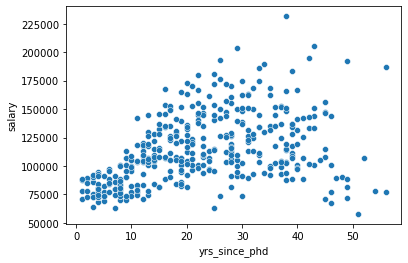

In [29]:
sns.scatterplot(data = df2, x='yrs_since_phd', y='salary')

<AxesSubplot:xlabel='yrs_service', ylabel='salary'>

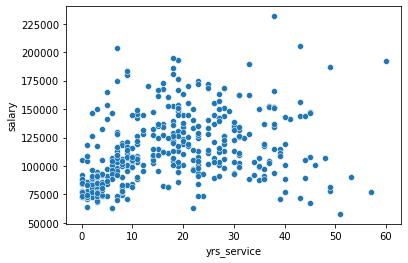

In [30]:
sns.scatterplot(data = df2, x='yrs_service', y='salary')

<AxesSubplot:>

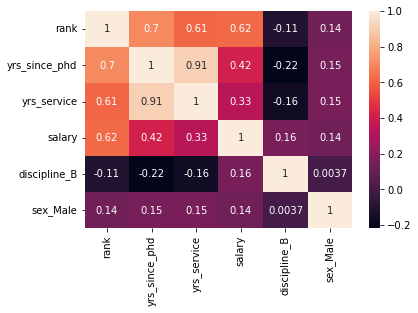

In [31]:
# checking correlation with salary
sns.heatmap(df2.corr(), annot=True)

In [32]:
## removing 'discipline column'
y = df2['salary']
x = df2.drop(['salary', 'discipline_B'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = Ridge()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.5275527310985958
MAE :  14964.54399636577
MSE :  325918502.8252404
SMSE :  18053.213088678713
-----------
-----------
training score :  0.3626201113364623
testing score :  0.5275527310985958


from above it is observed that even if the 'discipline column' has very low corelation with salary - label, it has some affect on predictions, hence we cannot discard the discipline column.
to improve predictions, lets use standardscaler/powertransformation
Using BayesianRidge(), applying StandardScaler() on features & log transformation on target

In [33]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = StandardScaler()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = BayesianRidge()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6378994930583136
MAE :  12608.44406430713
MSE :  249795612.89267135
SMSE :  15804.923691453601
-----------
-----------
training score :  0.4767213183648853
testing score :  0.6921097126028206


# Using LinearRegression(), applying StandardScaler() on features & log transformation on target

In [34]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = StandardScaler()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))



print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6410659115256694
MAE :  12509.595242026075
MSE :  247611254.0570313
SMSE :  15735.66821132904
-----------
-----------
training score :  0.4769731361936822
testing score :  0.6950243683056851


# Using LinearRegression(), applying PowerTransformer() on features & log transformation on target

In [36]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.633975043517752
MAE :  12677.113025791035
MSE :  252502900.67453796
SMSE :  15890.33985396593
-----------
-----------
training score :  0.4811740510675492
testing score :  0.6893069542962844


<AxesSubplot:>

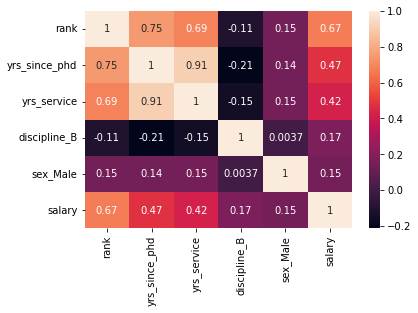

In [37]:
for_corr = pd.concat([X, Y], axis = 1)
sns.heatmap(for_corr.corr(), annot=True)

# removing sex column.. & studying impact on the predictions.

In [38]:
y = df2['salary']
x = df2.drop(['salary', 'sex_Male'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6315704849856726
MAE :  12874.521081868148
MSE :  254161689.21733838
SMSE :  15942.449285393333
-----------
-----------
training score :  0.4786741972398182
testing score :  0.6877452610728796


# Checking distribution after transformation..

-0.1322553119071545


<AxesSubplot:ylabel='Frequency'>

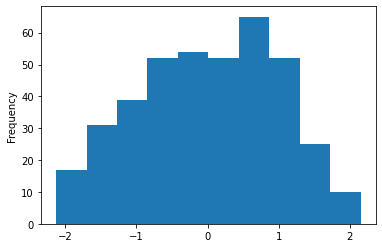

In [39]:
print(stat.skew(X['yrs_since_phd']))
X['yrs_since_phd'].plot(kind="hist")

-0.1216894934107749


<AxesSubplot:ylabel='Frequency'>

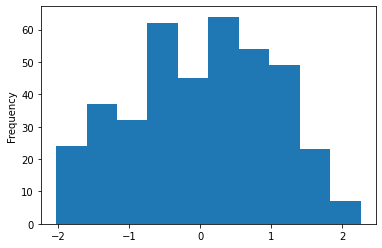

In [40]:
print(stat.skew(X['yrs_service']))
X['yrs_service'].plot(kind="hist")

0.14153547418619686


<AxesSubplot:ylabel='Frequency'>

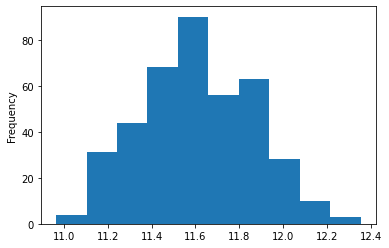

In [41]:
print(stat.skew(Y))
Y.plot(kind="hist")

In [42]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)


lm_multi_1 = smf.ols(formula = 'salary ~ rank + yrs_since_phd + yrs_service + sex_Male + discipline_B', data = pd.concat([X , Y], axis=1)).fit()

lm_multi_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     84.12
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           7.69e-60
Time:                        00:16:09   Log-Likelihood:                 116.66
No. Observations:                 397   AIC:                            -221.3
Df Residuals:                     391   BIC:                            -197.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.6073      0.009   1272.565      0.000      11.589      11.625
rank              0.1783      0.014     12.915      0.000       0.151       0.205
yrs_since_phd     0.0352      0.024      1.441      0.150      -0.013       0.083
yrs_service      -0.0360      0.022     -1.633      0.103      -0.079       0.007
sex_Male          0.0125      0.009      1.349      0.178      -0.006       0.031
discipline_B      0.0664      0.009      7.053      0.000       0.048       0.085
==============================================================================
Omnibus:                        8.439   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               14.144
Skew:                           0.003   Prob(JB):                     0.000849
Kurtosis:                       3.925   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Baseline model

In [43]:
# baseline_model = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#                   n_estimators=50, random_state=2)

# baseline_model = OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
#                           normalize=True, precompute='auto', tol=None)


baseline_model = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


# baseline_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=2, solver='auto', tol=0.001)

# baseline_model = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#               importance_type='split', learning_rate=0.1, max_depth=-1,
#               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
#               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [44]:
baseline_model.fit(x_train, y_train)

BayesianRidge()

In [45]:
kf = KFold(n_splits = 5)
results = cross_val_score(baseline_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [46]:
-results

array([0.0470879 , 0.04111212, 0.04059527, 0.03411   , 0.02575523])

In [47]:
np.exp(np.sqrt(np.mean(-results)))

1.2143968511891903

In [48]:
np.exp(y_test)

171    151575.0
164     88795.0
82     144640.0
275     93000.0
181    141136.0
76     150480.0
303    105260.0
331    116518.0
119     73500.0
41      93418.0
222    107150.0
68     111512.0
231     73300.0
279    100600.0
173    134185.0
89     107008.0
299     70700.0
67      99418.0
242    102600.0
110    112429.0
315     84716.0
121    124309.0
147    156938.0
84     122960.0
338    128464.0
354     83600.0
193     86250.0
232    148750.0
14     104800.0
329    134778.0
237     63100.0
349    144309.0
276    107200.0
61      75243.0
13      78000.0
186    103750.0
66     101000.0
74     113398.0
155    118971.0
254    116450.0
86     152708.0
183    150000.0
18     124750.0
341    124312.0
226     63900.0
124     96614.0
40     146500.0
394    101738.0
190    180000.0
380     75996.0
56     117704.0
139    152664.0
143     89942.0
7      147765.0
70     126320.0
319    135027.0
214    118700.0
96      95611.0
229    133900.0
69      91412.0
153    103994.0
108     81500.0
258     

In [49]:
test_ids = pd.Series(y_test.index, name='id')
y_pred = np.exp(baseline_model.predict(x_test))
sub = pd.concat([test_ids, pd.Series(y_pred, name='salary')], axis=1)
sub

,id,salary
0,171,130373.837769
1,164,86267.800967
2,82,130934.020512
3,275,116476.463215
4,181,133819.284453
5,76,134447.860176
6,303,117718.905200
7,331,132979.731361
8,119,76274.337247
9,41,95196.940381


In [50]:
y_pred

array([130373.83776939,  86267.80096668, 130934.02051184, 116476.46321533,
       133819.28445336, 134447.86017606, 117718.90520015, 132979.73136065,
        76274.3372472 ,  95196.94038113,  96203.39629076, 130245.91274975,
        84528.42954141, 116851.18990812, 130438.34371962,  95015.29356762,
        85595.53330261, 131989.68985495, 116510.98598457, 116060.61687075,
        86521.07457026, 116047.37645133, 130895.00342374, 130044.33267639,
       132310.93946731,  87826.67273068,  95007.86768852, 119071.76389455,
       130824.99566064, 130633.29136151,  76010.48717252, 130737.835458  ,
       117591.12525919,  85996.34946835,  86675.47411957,  95290.43829091,
       132665.31451173, 131785.31459635, 130503.12260212, 119875.87432355,
       131549.24088948, 131510.95382383, 118228.90299004, 130245.91274975,
        76436.51673053, 115891.6355886 , 136583.00483298, 118792.69003659,
       133485.0656419 ,  76959.70224692, 130989.91213433, 115917.39476594,
        85641.6283682 , 1

In [51]:
print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', baseline_model.score(x_train, y_train))
print('testing score : ', baseline_model.score(x_test, y_test))

r2 score :  0.6299168437191005
MAE :  12926.288477489465
MSE :  255302456.28551188
SMSE :  15978.186889804234
-----------
-----------
training score :  0.47849769776185913
testing score :  0.6856508941117951


# Bagging models

In [52]:
models = {
    'ridge' : Ridge(),
    'br' : BayesianRidge(),
    'lr' : LinearRegression(),
    'lar': Lars(),
    'huber' : HuberRegressor() 
}

In [53]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + ' trained.')

ridge trained.
br trained.
lr trained.
lar trained.
huber trained.


In [54]:
results = {}

kf = KFold(n_splits = 5)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [55]:
results

{'ridge': array([1.24176903, 1.22486021, 1.22255895, 1.20362499, 1.17468005]),
 'br': array([1.24234094, 1.22478   , 1.22321506, 1.20284421, 1.17407943]),
 'lr': array([1.2415873 , 1.22489896, 1.22236318, 1.20396161, 1.17491833]),
 'lar': array([1.2415873 , 1.22489896, 1.22236318, 1.20396161, 1.17491833]),
 'huber': array([1.24820933, 1.22539859, 1.22722812, 1.19851009, 1.1757929 ])}

In [56]:
for name, result in results.items():
    print("------\n" + name + '\n------')
    print(np.mean(result))
    print(np.std(result))

------
ridge
------
1.2134986470852087
0.022868148949648146
------
br
------
1.213451928591254
0.023327823348904868
------
lr
------
1.213545876480509
0.022702004342233927
------
lar
------
1.2135458764805092
0.022702004342233833
------
huber
------
1.2150278066878084
0.025177877330038057


# Combine predictions

In [57]:
def predict_salary(x_test):
    final_pred = (
        0.2*np.exp(models['ridge'].predict(x_test)) +
        0.2*np.exp(models['br'].predict(x_test)) +
        0.2*np.exp(models['lr'].predict(x_test)) +
        0.2*np.exp(models['lar'].predict(x_test)) +
        0.2*np.exp(models['huber'].predict(x_test)))
    return final_pred

final_pred = predict_salary(x_test)

In [58]:
final_pred

array([131011.12477345,  86111.14093943, 131455.64456411, 115947.48078526,
       133350.52677116, 133766.92511506, 116850.05412392, 132811.51562043,
        75862.57107447,  95513.65110008,  96021.6939873 , 130878.76600402,
        84305.9608413 , 116762.51447427, 131076.99352494,  95137.44684268,
        85238.49247252, 132419.93611251, 116418.10254051, 115818.55527098,
        86420.90621643, 116012.51814418, 131531.22947812, 130742.33677432,
       132583.90629992,  87351.42992475,  95321.95842422, 118168.97450368,
       131338.87919327, 131273.18721716,  75722.69167358, 131425.26055757,
       117343.39927381,  85990.74718372,  86422.65619945,  95403.98265464,
       132636.01510017, 132152.97990906, 131142.63378015, 118587.34292834,
       132158.27879655, 131928.13583521, 117574.81596615, 130878.76600402,
        75929.27227886, 115774.52306992, 135376.20273964, 118030.7188235 ,
       133199.86638172,  76384.93275231, 131514.41785326, 115738.9169006 ,
        85751.29703766, 1

In [59]:
print('r2 score : ', r2_score(np.exp(y_test), final_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), final_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), final_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), final_pred)))

r2 score :  0.6288093657293361
MAE :  12841.408889151138
MSE :  256066451.74510083
SMSE :  16002.076482291317


In [62]:
import joblib
joblib.dump(final_pred,'Salary_Final.pkl')

['Salary_Final.pkl']

# Conclusion : Using Bagging model for given dataset is the best approach